# TP Informatique n°4 : recherche de la valeur approchée d'un zéro d'une fonction

## Exercice 1 : la dichotomie

In [2]:
def dichotomie(f, a, b, epsilon = 1e-6):
    """Renvoie un encadrement à epsilon près d'une solution de f(x)=0 sur l'intervalle [a,b]"""
    g = a
    d = b
    while d - g > epsilon:
        m = (g+d)/2
        if f(g)*f(m) <= 0:
            d = m
        else:
            g = m
    return g, d

L'égalité dans `epsilon = 1e-6` signifie que le paramètre `epsilon` est optionnel. Si la fonction est utilisée avec deux arguments seulement, la valeur pour `epsilon` sera $10^{-6}$.

In [3]:
def g(x):
    return x**2-2

In [7]:
print(dichotomie(g, -2, -1))

(-1.4142141342163086, -1.4142131805419922)


L'encadrement obtenu correspond bien à un encadrement de $-\sqrt{2}$, unique solution de $g(x)=0$ sur $[-2,-1]$.

In [10]:
print(dichotomie(g, 1, 2))

(1.4142131805419922, 1.4142141342163086)


L'encadrement obtenu correspond bien à un encadrement de $\sqrt{2}$, unique solution de $g(x)=0$ sur $[1,2]$.

In [11]:
print(dichotomie(g, -2, 2))

(-1.4142141342163086, -1.4142131805419922)


On obtient un encadrement de $-\sqrt{2}$, qui est **une** solution de $g(x)=0$ sur $[-2,2]$.

In [12]:
import numpy as np
def h1(x):
    return np.cos(x)-x

In [18]:
print(dichotomie(h1, -1, 1))

(0.7390842437744141, 0.7390851974487305)


Pour vérifier, traçons les courbes des fonctions $\cos$ et $x \mapsto x$ :

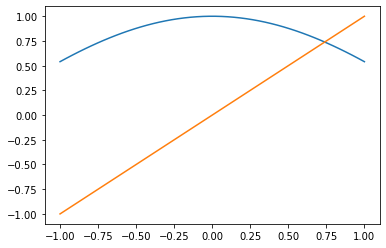

In [21]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 1)
plt.plot(x, np.cos(x))
plt.plot([-1,1], [-1,1])
plt.show()

In [14]:
import numpy as np
def h2(x):
    return np.exp(x)-x

In [26]:
print(dichotomie(h2,-2, 2))

(1.9999990463256836, 2)


Traçons les courbes des fonctions $\exp$ et $x \mapsto x$ :

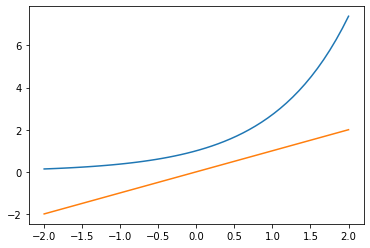

In [28]:
import matplotlib.pyplot as plt
xmin = -2
xmax = 2
x = np.linspace(xmin, xmax)
plt.plot(x, np.exp(x))
plt.plot([xmin, xmax], [xmin, xmax])
plt.show()

En réalité, la fonction $x \mapsto e^x -x$ ne s'annule jamais (elle est décroissante sur $]-\infty, 0]$, croissante sur $[0, +\infty[$ et admet un minimum en $0$ qui vaut $1$).

La méthode par dichotomie donne tout de même un résultat. Attention à bien vérifier les hypothèses d'application avant de l'utiliser.

## Exercice 2 : interaction de Van der Waals dipôle-dipôle de Keesom

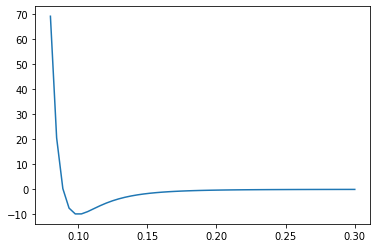

In [33]:
import matplotlib.pyplot as plt
import numpy as np

A =2e-5
B = 1e-11

def Ep(r):
    return B/r**12 - A/r**6

les_r = np.linspace(0.08, 0.3)
les_Ep = [Ep(r) for r in les_r]

plt.plot(les_r, les_Ep)

Déterminer $r_min$ revient à trouver le point d'annulation de la dérivée de $E_p$ en fonction de $r$.

Or $E_p(r)=B.r^{-12}-A.r^{-6}$, donc $E_p'(r)= -12B.r^{-13} + 6A.r^{-7}$

In [34]:
def Ep_prime(r):
    return -12*B/r**13 + 6*A/r**7

In [36]:
rmin_g, rmin_d = dichotomie(Ep_prime, 0.08, 0.3)
rmin = (rmin_g + rmin_d)/2
Ep_rmin = Ep(rmin)
print(rmin, Ep_rmin)

0.10000019073486327 -9.999999998690347


Il est aussi possible d'approximer la dérivée en utilisant
$$f'(x) \approx \frac{f \left( x + \frac{h}{2}\right) - f \left( x - \frac{h}{2}\right)}{h}$$
avec $h$ très petit.

In [38]:
def Ep_prime_approx(r, h=1e-6):
    return (Ep(r+h/2) - Ep(r-h/2))/h

In [39]:
rmin_g, rmin_d = dichotomie(Ep_prime_approx, 0.08, 0.3)
rmin = (rmin_g + rmin_d)/2
Ep_rmin = Ep(rmin)
print(rmin, Ep_rmin)

0.10000019073486327 -9.999999998690347


Enfin, résoudre $Ep'(r) = 0$ directement ne présente aucune difficulté :

$$E_p'(r)=0 \iff \frac{6A}{r^7} = \frac{12B}{r^{13}} \iff r^6 = \frac{2B}{A}  \iff r = \sqrt[6]{ \frac{2B}{A}}$$

Donc $r_{min} =  \sqrt[5]{ \frac{2B}{A}} = \sqrt[6]{10^{-6}} = 0,1$

# Suite du TP n°3
## Exercice 3 : Synthèse de Fourier

In [46]:
def creneau(f, t):
    return np.sign(np.sin(2*np.pi*f*t))

In [53]:
def creneau2(f, N, t):
    omega = 2*np.pi*f
    
    s = 0
    for p in range(N):
        s = s + (1/(2*p+1)) * np.sin( (2*p+1) * omega * t )
        
    return s*4/np.pi

In [58]:
def trace_creneau(f):
    omega = 2*np.pi*f
    n_ech = 400
    
    
    les_t = np.linspace(0, 2*np.pi/omega, n_ech) # *liste* des abscisses
    
    plt.plot(les_t, creneau(f, les_t), label="signal créneau")
    
    plt.plot(les_t, 4/np.pi*np.sin(omega*les_t), label="fondamental")
    
    for N in [3, 5, 100]:
        # construction de la liste des ordonnées en *compréhension*
        les_y = [creneau2(f, N, t) for t in les_t] 
        plt.plot(les_t, les_y, label="N="+str(N))
    
    plt.legend()
    plt.savefig('creneau.png')
    plt.show()

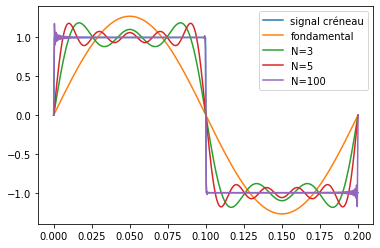

In [59]:
trace_creneau(5)